## Medial Axis


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from grid import create_grid
from skimage.morphology import medial_axis
from skimage.util import invert
from planning import a_star
from planning import heuristic_euclidean, heuristic_manhattan
%matplotlib inline 

In [5]:
plt.rcParams['figure.figsize'] = 12, 12

In [6]:
# This is the same obstacle data from the previous lesson.
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ...
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


Starting and goal positions in *(north, east)*.

In [20]:
start_ne = (25,  100)
goal_ne = (750., 800.)

In [9]:
# Static drone altitude (meters)
drone_altitude = 5
safety_distance = 2

In [10]:
grid = create_grid(data, drone_altitude, safety_distance)
skeleton = medial_axis(invert(grid))

Plot the edges on top of the grid along with start and goal locations.

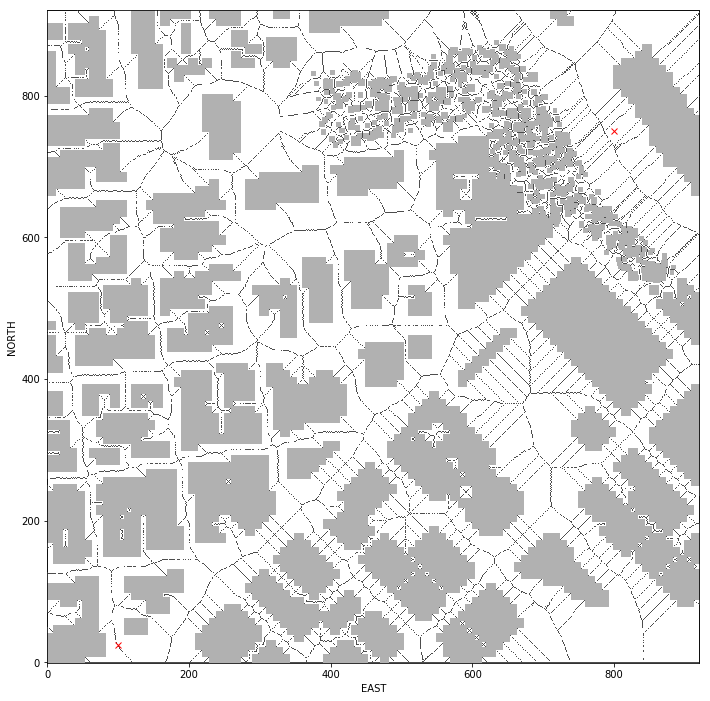

In [21]:
# equivalent to
# plt.imshow(np.flip(grid, 0))

plt.imshow(grid, cmap='Greys', origin='lower')
plt.imshow(skeleton, cmap='Greys', origin='lower', alpha=0.7)
    
plt.plot(start_ne[1], start_ne[0], 'rx')
plt.plot(goal_ne[1], goal_ne[0], 'rx')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

In [22]:
def find_start_goal(skel, start, goal):
    
    skel_cells = np.transpose(skel.nonzero())
    start_min_dist = np.linalg.norm(np.array(start) - np.array(skel_cells), axis=1).argmin()
    near_start = skel_cells[start_min_dist]
    goal_min_dist = np.linalg.norm(np.array(goal) - np.array(skel_cells), axis=1).argmin()
    near_goal = skel_cells[goal_min_dist]
    
    return near_start, near_goal

skel_start, skel_goal = find_start_goal(skeleton, start_ne, goal_ne)

print(start_ne, goal_ne)
print(skel_start, skel_goal)


(25, 100) (750.0, 800.0)
[ 24 100] [756 793]


### TODO: Run A* on the skeleton
see [planning.py](/edit/planning.py) for a reminder on how to run the imported A* implementation (or rewrite it!)

In [23]:
print(invert(skeleton))
print(grid)

[[ True  True  True ... False False False]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True False]
 ...
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True False]
 [False False False ... False False  True]]
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [24]:
# Compare to regular A* on the grid
path, cost, steps = a_star(invert(skeleton).astype(np.int), heuristic_euclidean, tuple(skel_start), tuple(skel_goal))
path2, cost2, steps2 = a_star(grid, heuristic_euclidean, start_ne, goal_ne)
path3, cost3, steps3 = a_star(invert(skeleton).astype(np.int), heuristic_manhattan, tuple(skel_start), tuple(skel_goal))
path4, cost4, steps4 = a_star(grid, heuristic_manhattan, start_ne, goal_ne)



Found a path.
Found a path.
Found a path.
Found a path.


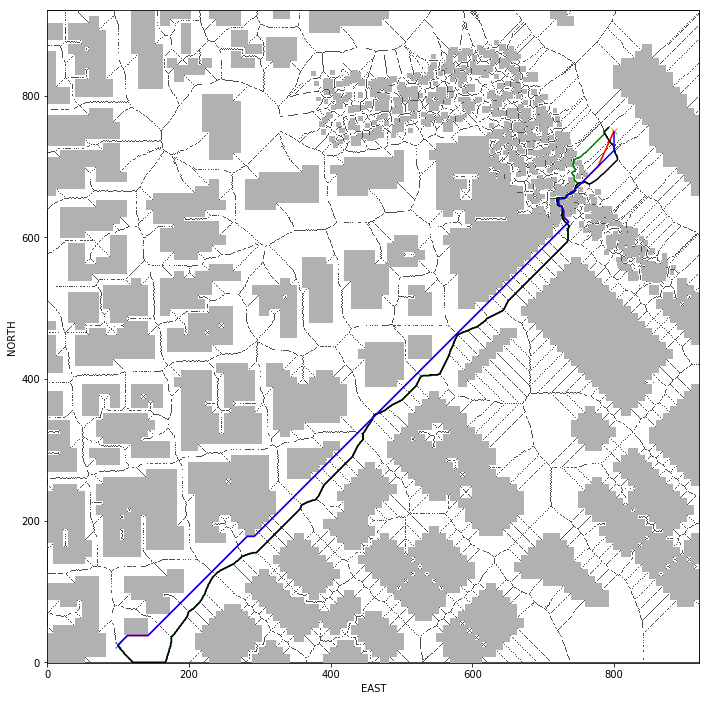

In [25]:
plt.imshow(grid, cmap='Greys', origin='lower')
plt.imshow(skeleton, cmap='Greys', origin='lower', alpha=0.7)
# For the purposes of the visual the east coordinate lay along
# the x-axis and the north coordinates long the y-axis.
plt.plot(start_ne[1], start_ne[0], 'x')
# Uncomment the following as needed
plt.plot(goal_ne[1], goal_ne[0], 'x')

pp = np.array(path)
plt.plot(pp[:, 1], pp[:, 0], 'g')
pp2 = np.array(path2)
plt.plot(pp2[:, 1], pp2[:, 0], 'r')
pp3 = np.array(path3)
plt.plot(pp3[:, 1], pp3[:, 0], 'k')
pp4 = np.array(path4)
plt.plot(pp4[:, 1], pp4[:, 0], 'b')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

[solution](/notebooks/Medial-Axis-Solution.ipynb)